# Monte Carlo Markov Chain Metropolis algorithm

Antes de aplicar el método, debemos ver si los datos tienen algún tipo de error
*   Definimos valores iniciales de los parámetros libres.
    $$ \theta_{ini} = [] $$
*   Proponemos un nuevo y aleatorio conjunto de parámetros libres con una distribución Gaussiana centrada en los parámetros iniciales, con una dispersión predefinida. \\
    Si tenemos 2 puntos, elegimos la sigma a partir de una distribución Gaussiana. La sigma define el espacio de parámetros de un dato dado. Si es muy grande o muy chica, es muy difícil que incluya al dato.
    $$ \theta_{prop} = [gaussian(\theta_{ini}, \sigma), gaussian (\theta_{ini}, \sigma)] $$
*  Evaluar el logaritmo de posterior del parámetro inicial y de los parámetros propuestos para compararlos.
  $$ ln Post(\theta_{ini}), ln Post $$
  Si $ ln Post(\theta_{prop})>ln Post (\theta_{ini}) $ \\
  *  acepto $ \theta_{prop} $ \\
  *  guardo $ \theta_{prop} $ \\
  *  $ \theta_{ini} = \theta_{prop} $
  
  Si no:
  * $ ptest = Uniform (o,1) $
  * si $ (ln Post (\theta_{prop}) - ln Post (\theta_{ini})> ln(ptest)) $:
      *  acepto $ \theta_{prop} $
      *  guardo $ \theta_{prop} $
      * $ \theta_{ini} = \theta_{prop} $
    
  * si no:
    * guardo $ \theta_{ini} = \theta_{ini} $

  Terminamos con una lista con la distribución de los $\theta$ 's. El algoritmo da una dispersión que maximiza el posterior.
  El máximo posterior da un número, el bayesiano cuál es valor promedio. Nos da un Verdadero al decir que el dato está dentro de la distribución.
  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
data = np.loadtxt('/content/drive/MyDrive/Data/olympic100m_men.txt',delimiter=',').T
x = data[0]
y = data[1]

In [86]:
X = np.vstack((np.ones_like(x),x)).T
X.shape

(27, 2)

In [88]:
def lineal (X, w):
  # x,y,w deben ser arreglos de numpy
  w = np.array(w)
  return X@w # [7,2]*[2,1]=[7,1]

In [95]:
def logaritmo (y, x, w, model = lineal): #lo definimos de esta manera para no usar ciclos for para la sumatoria
  log = (y - model(x,w))**2
  log = np.sum(log)
  return log

def Prior (w, w_max, w_min):
  if (w_min[0]<w[0]<w_max[0]) and (w_min[1]<w[1]<w_max[1]):
    return 1
  else:
    return np.inf

In [96]:
def MonteCarlo (x, y, w_inter, iter, sigma = 0.1, model = lineal, log = logaritmo):
  # Definimos el parámetro inicial
  theta_ini = [0,0]
  w0 = float(input('Indica el w0:'))
  theta_ini[0] = w0
  w1 = float(input('Indica el w1:'))
  theta_ini[1] = w1


  thetas = []

  i = 0
  while i < iter:
    # Generamos la propuesta
    theta_prop = [np.random.normal(theta_ini[0], sigma), np.random.normal(theta_ini[1], sigma)]

    log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
    log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))

    if log_prop > log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)

    if log_prop == log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)
    i +=1

  return np.array(thetas)

Indica el w0:100
Indica el w1:-5


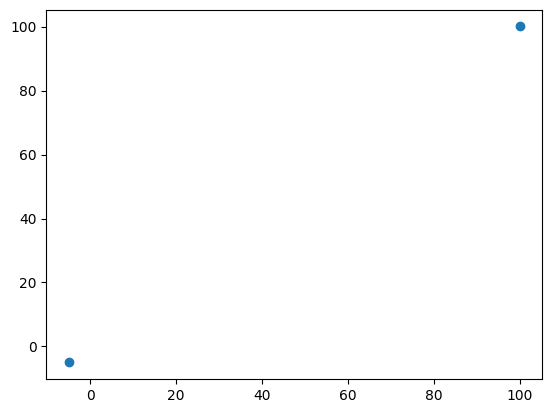

In [98]:
w_inter = [[50, 1], [20, -1]]
chain = MonteCarlo(X, y, w_inter, iter = 10000, sigma = 0.05)

w0s = chain[0].T
w1s = chain[1].T

plt.scatter(w0s, w1s)